## Importing basic Python libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [3]:
data = pd.read_csv("laptop_data.csv")

In [4]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
data.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


## Preliminary data exploration

In [6]:
data.shape

(1303, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [8]:
data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.drop(columns = ['Unnamed: 0'], inplace = True)

In [11]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [12]:
data ['Ram'] = data['Ram'].str.replace('GB', '')
data ['Ram'] = data['Ram'].astype('int')

In [13]:
data ['Weight'] = data ['Weight'].str.replace('kg', '')
data ['Weight'] = data['Weight'].astype('float')

In [14]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


## Exploaratory data analysis

#### Histogram plot for Price

<Figure size 800x600 with 0 Axes>

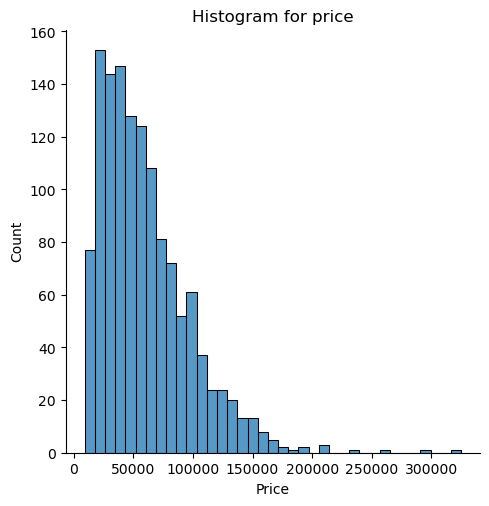

In [16]:
plt.figure(figsize = (8,6))
sns.displot(data = data, x = 'Price')
plt.title("Histogram for price")
plt.show()

#### Count of laptops for different brands

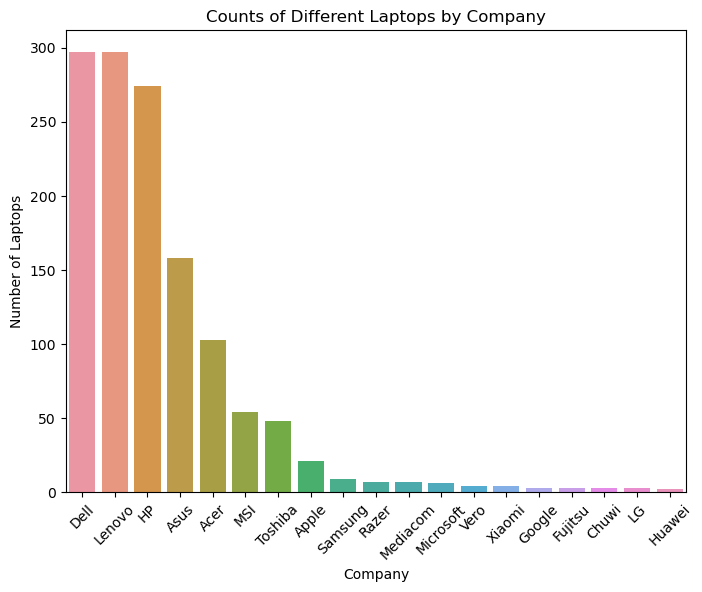

In [17]:
laptop_counts = data.groupby('Company').size().reset_index(name='Counts')
laptop_counts_sorted = laptop_counts.sort_values(by='Counts', ascending=False)
# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(data=laptop_counts_sorted, x='Company', y='Counts')
plt.xlabel('Company')
plt.ylabel('Number of Laptops')
plt.title('Counts of Different Laptops by Company')
plt.xticks(rotation=45)
plt.show()

#### Average Price of different laptop brands

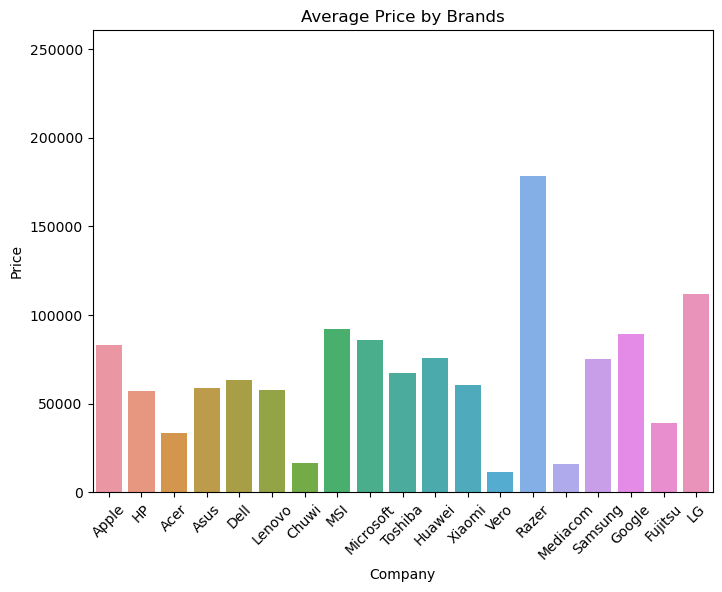

In [18]:
plt.figure(figsize = (8,6))
sns.barplot(data = data, x = 'Company', y = 'Price', errwidth = 0)
plt.title("Average Price by Brands")
plt.xlabel('Company')
plt.ylabel('Price')
plt.xticks(rotation = 45)
plt.show()

#### Number laptops by type

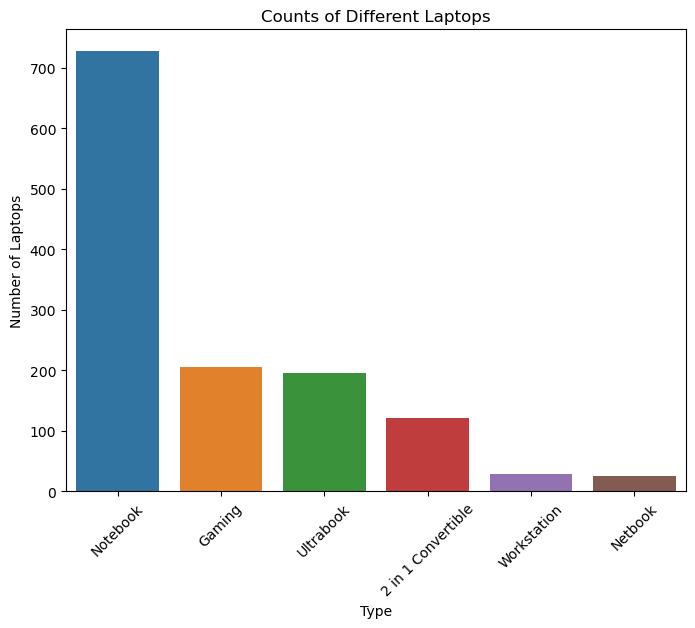

In [19]:
type_counts = data.groupby('TypeName').size().reset_index(name='Counts')
type_counts_sorted = type_counts.sort_values(by='Counts', ascending=False)
# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(data=type_counts_sorted, x='TypeName', y='Counts')
plt.xlabel('Type')
plt.ylabel('Number of Laptops')
plt.title('Counts of Different Laptops')
plt.xticks(rotation=45)
plt.show()

#### Average Price by laptop type

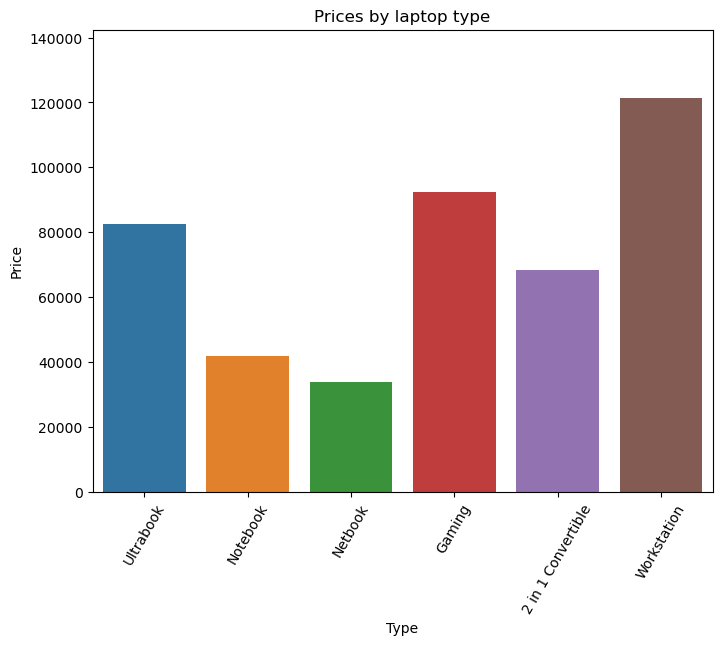

In [20]:
plt.figure (figsize = (8,6))
sns.barplot(data = data, x = 'TypeName', y = 'Price', errwidth = 0)
plt.title ("Prices by laptop type")
plt.xlabel('Type')
plt.ylabel('Price')
plt.xticks(rotation = 60)
plt.show()

#### Relationship between price and laptop screen size

<Figure size 600x600 with 0 Axes>

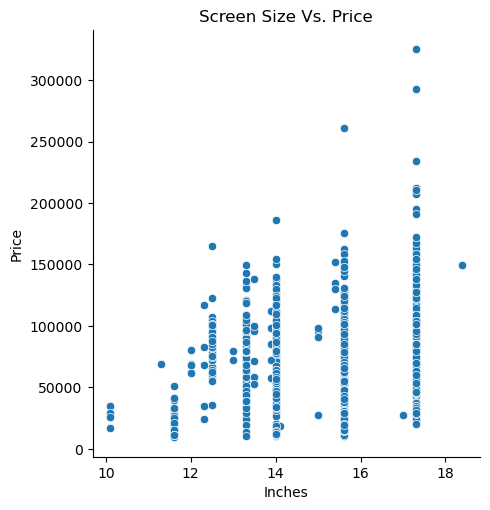

In [21]:
plt.figure (figsize = (6,6))
sns.relplot (data = data, x = 'Inches', y = 'Price')
plt.title("Screen Size Vs. Price")
plt.xlabel('Inches')
plt.ylabel('Price')
plt.show()

### Feature Engineering

#### Treating the Screen Resolution Column

In [22]:
data ['Touchscreen']= data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

<AxesSubplot:>

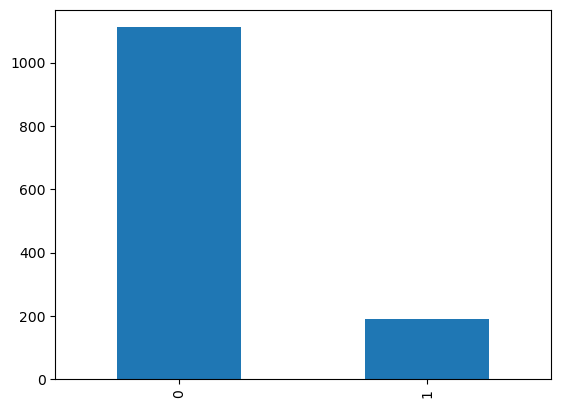

In [23]:
data ['Touchscreen'].value_counts().plot(kind = 'bar')

#### Variation in prices based on availability of touch screen

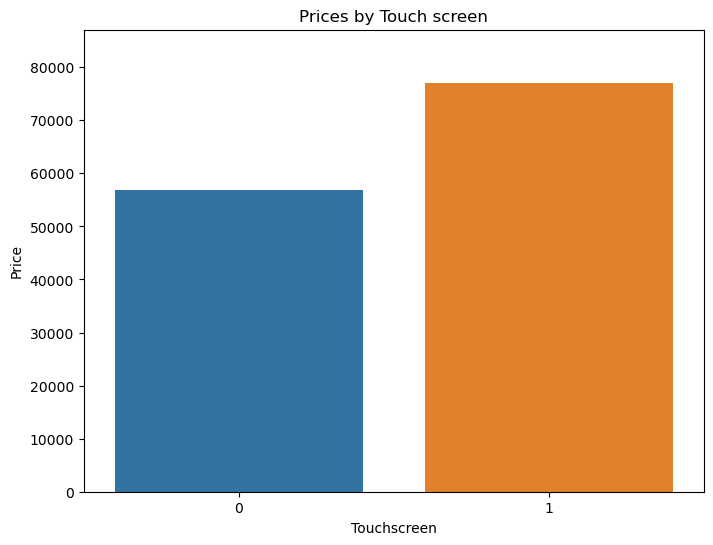

In [24]:
plt.figure(figsize = (8,6))
sns.barplot (data = data, x = 'Touchscreen', y = 'Price', errwidth = 0)
plt.title ("Prices by Touch screen")
plt.xlabel('Touchscreen')
plt.ylabel('Price')
plt.show()

#### IPS Panel

In [25]:
data ['IPS panel'] = data['ScreenResolution'].apply(lambda x: 1 if 'IPS Panel' in x else 0)

<AxesSubplot:>

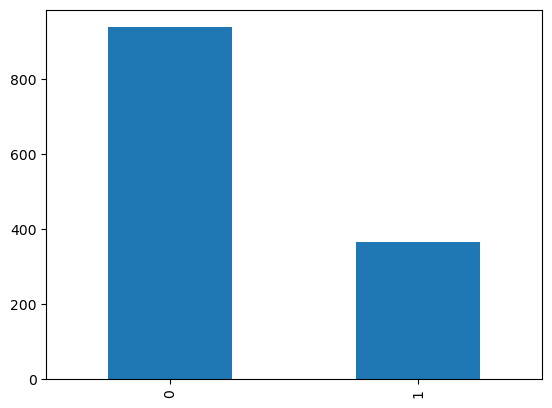

In [26]:
data['IPS panel'].value_counts().plot(kind = 'bar')

#### Variation in prices in terms of touch screen

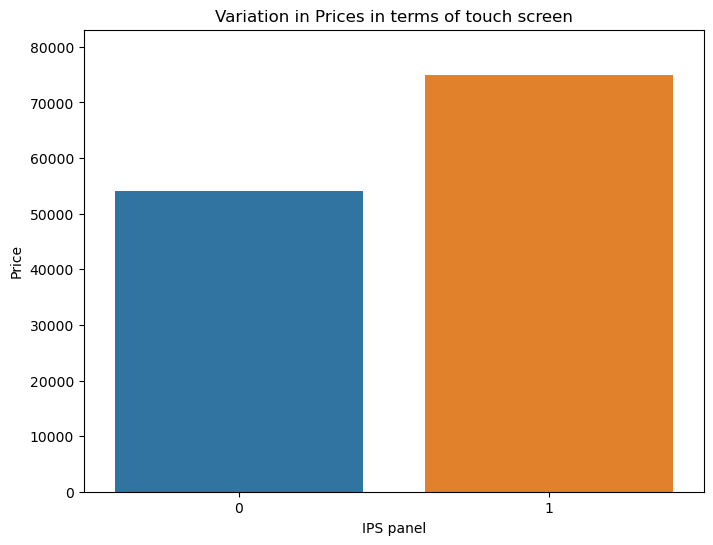

In [27]:
plt.figure(figsize = (8,6))
sns.barplot(data = data, x = 'IPS panel', y = 'Price', errwidth = 0)
plt.title ("Variation in Prices in terms of touch screen")
plt.xlabel('IPS panel')
plt.ylabel('Price')
plt.show()

#### Extracting Screen resolution

In [28]:
temp = data['ScreenResolution'].str.split('x', n = 1, expand = True)

In [29]:
data ['X_resolution'] = temp[0]
data['Y_resolution'] = temp[1]

In [30]:
data ['X_resolution'] = data['X_resolution'].str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

In [31]:
data.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS panel,X_resolution,Y_resolution
1044,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.54,53280.0000,0,0,1920,1080
1094,HP,Netbook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 7,2.40,85194.7200,0,0,1366,768
259,Lenovo,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,512GB SSD,Nvidia GeForce GTX 1050M,Windows 10,2.00,90522.7200,1,1,1920,1080
1119,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,3.52,69929.4672,0,0,1920,1080
456,Dell,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.7GHz,8,1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42,109010.8800,0,1,1920,1080
862,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.05,68464.8000,0,0,1920,1080
654,HP,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,No OS,1.86,19441.8720,0,0,1366,768
1195,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.21,70702.5600,0,1,1920,1080
599,Dell,Workstation,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia Quadro M620,Windows 10,2.06,93932.6400,1,0,1920,1080
883,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,1TB HDD,Nvidia GeForce 940MX,Windows 10,2.20,35644.3200,0,1,1920,1080


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS panel         1303 non-null   int64  
 13  X_resolution      1303 non-null   object 
 14  Y_resolution      1303 non-null   object 
dtypes: float64(3), int32(1), int64(2), object(9)
memory usage: 147.7+ KB


In [33]:
data['X_resolution'] = data['X_resolution'].astype('int32')
data['Y_resolution'] = data['Y_resolution'].astype('int32')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS panel         1303 non-null   int64  
 13  X_resolution      1303 non-null   int32  
 14  Y_resolution      1303 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 137.6+ KB


In [35]:
data.corr()['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
IPS panel       0.252208
X_resolution    0.556529
Y_resolution    0.552809
Name: Price, dtype: float64

#### Creation of a New column called PPI (Pixels per Inches)

In [36]:
data['PPI'] = (((data['X_resolution']**2) + (data['Y_resolution']**2))**0.5/data['Inches']).astype('float')

In [37]:
data.corr()['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
IPS panel       0.252208
X_resolution    0.556529
Y_resolution    0.552809
PPI             0.473487
Name: Price, dtype: float64

In [38]:
data.drop(['ScreenResolution'], axis = 1, inplace = True)

In [39]:
data.columns

Index(['Company', 'TypeName', 'Inches', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys',
       'Weight', 'Price', 'Touchscreen', 'IPS panel', 'X_resolution',
       'Y_resolution', 'PPI'],
      dtype='object')

In [40]:
data.drop(['Inches', 'X_resolution', 'Y_resolution'], axis = 1, inplace = True)

In [41]:
data.columns

Index(['Company', 'TypeName', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price', 'Touchscreen', 'IPS panel', 'PPI'],
      dtype='object')

### Extracting Processor details

In [42]:
data['CPU Name'] = data['Cpu'].apply(lambda x: " ".join(x.split() [0:3]))

In [43]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS panel,PPI,CPU Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [44]:
def processor (text):
    try:
        if text == 'Intel Core i7' or text =='Intel Core i5' or text =='Intel Core i3':
            return text
        else:
            if text.split()[0]== "Intel":
                return "Other Intel Processor"
            else:
                return "AMD Processor"
    except Exception as e:
        print (e)

In [45]:
data['CPU Brand'] = data['CPU Name'].apply(processor)

<AxesSubplot:>

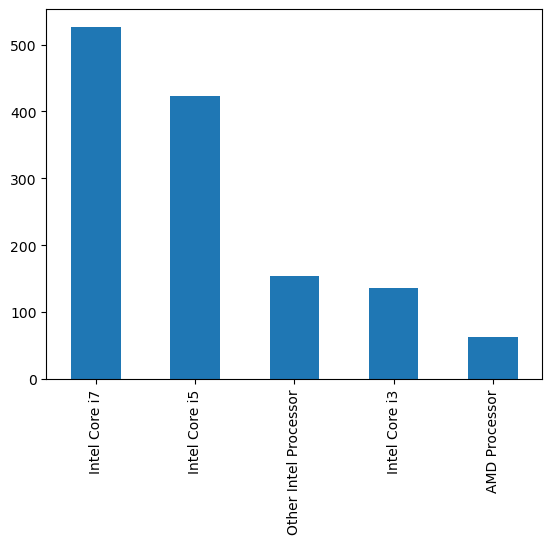

In [46]:
data['CPU Brand'].value_counts().plot(kind = 'bar')

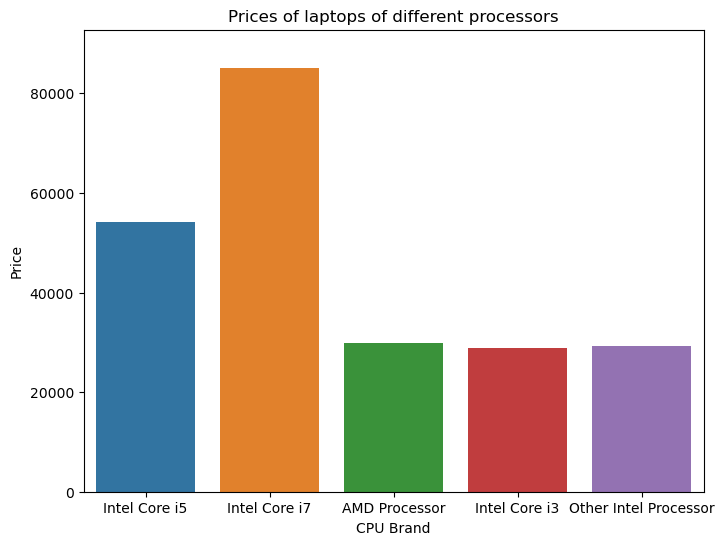

In [47]:
plt.figure(figsize = (8,6))
sns.barplot(data = data, x = 'CPU Brand', y = 'Price', errwidth = 0)
plt.title("Prices of laptops of different processors")
plt.xlabel('CPU Brand')
plt.ylabel('Price')
plt.show()

#### Dropping Cpu and CPU Name columns

In [48]:
data.drop(['Cpu', 'CPU Name'], axis = 1, inplace = True)

#### Evaluating RAM column

<AxesSubplot:>

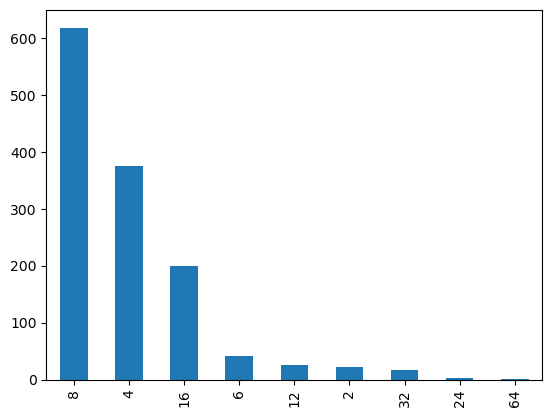

In [49]:
data['Ram'].value_counts().plot(kind = 'bar')

#### Price variations with RAM

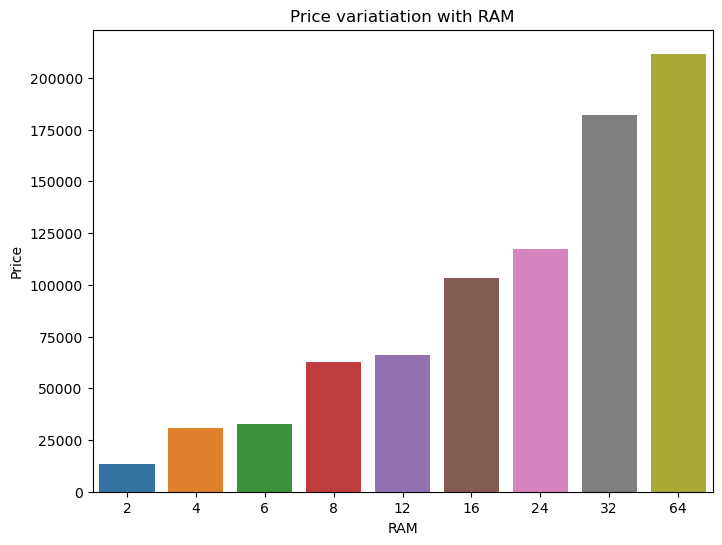

In [50]:
plt.figure(figsize = (8,6))
sns.barplot(data = data, x = 'Ram', y = 'Price', errwidth = 0)
plt.title ("Price variatiation with RAM")
plt.xlabel('RAM')
plt.ylabel('Price')
plt.show()

#### Feature Engineering on Memory column

In [51]:
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)
data["Memory"] = data["Memory"].str.replace('GB', '')
data["Memory"] = data["Memory"].str.replace('TB', '000')
new = data["Memory"].str.split("+", n = 1, expand = True)

data["first"]= new[0]
data["first"]=data["first"].str.strip()

data["second"]= new[1]

data["Layer1HDD"] = data["first"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer1SSD"] = data["first"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer1Hybrid"] = data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer1Flash_Storage"] = data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

data['first'] = data['first'].str.replace(r'\D', '')

data["second"].fillna("0", inplace = True)

data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

data['second'] = data['second'].str.replace(r'\D', '')

data["first"] = data["first"].astype(int)
data["second"] = data["second"].astype(int)

data["HDD"]=(data["first"]*data["Layer1HDD"]+data["second"]*data["Layer2HDD"])
data["SSD"]=(data["first"]*data["Layer1SSD"]+data["second"]*data["Layer2SSD"])
data["Hybrid"]=(data["first"]*data["Layer1Hybrid"]+data["second"]*data["Layer2Hybrid"])
data["Flash_Storage"]=(data["first"]*data["Layer1Flash_Storage"]+data["second"]*data["Layer2Flash_Storage"])

data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [52]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS panel,PPI,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [53]:
data.drop(['Memory'], axis = 1, inplace = True)

In [54]:
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS panel,PPI,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [55]:
data.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS panel        0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [56]:
data.drop(['Hybrid', 'Flash_Storage'], axis = 1, inplace = True)

In [57]:
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS panel,PPI,CPU Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


#### Feature Engineering on GPU column

In [58]:
data['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

#### Extracting Brand Name from GPU column

In [59]:
data ['GPU Brand'] = data['Gpu'].apply(lambda x: x.split ()[0])

In [60]:
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS panel,PPI,CPU Brand,HDD,SSD,GPU Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


<AxesSubplot:>

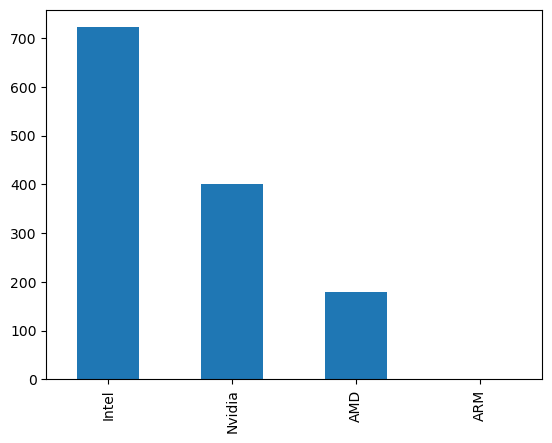

In [61]:
data['GPU Brand'].value_counts().plot(kind = 'bar')

#### Price variations with GPU

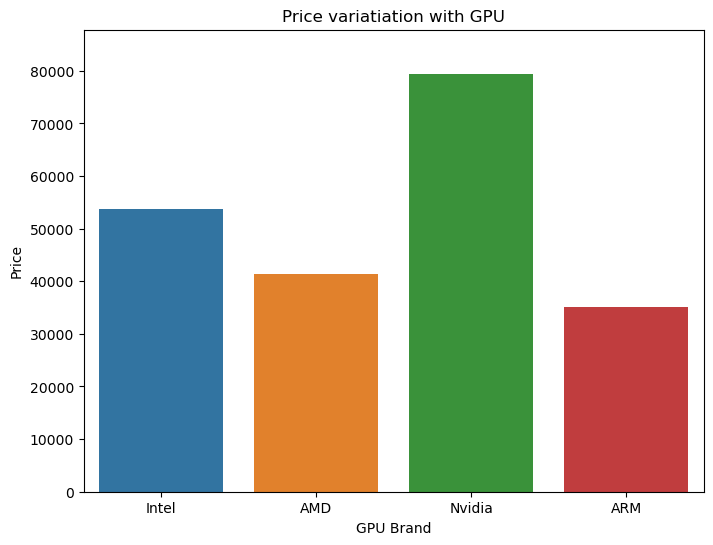

In [62]:
plt.figure(figsize = (8,6))
sns.barplot(data = data, x = 'GPU Brand', y = 'Price', errwidth = 0)
plt.title ("Price variatiation with GPU")
plt.xlabel('GPU Brand')
plt.ylabel('Price')
plt.show()

In [63]:
data.drop(['Gpu'], axis = 1, inplace = True)

In [64]:
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS panel,PPI,CPU Brand,HDD,SSD,GPU Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


#### Feature Engineering on OpSys column

In [65]:
data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [66]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [67]:
data['Operating System'] = data['OpSys'].apply(cat_os)

In [68]:
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS panel,PPI,CPU Brand,HDD,SSD,GPU Brand,Operating System
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [69]:
data.drop(['OpSys'], axis = 1, inplace = True)

In [70]:
data.head(10)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS panel,PPI,CPU Brand,HDD,SSD,GPU Brand,Operating System
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
5,Acer,Notebook,4,2.10,21312.0000,0,0,100.454670,AMD Processor,500,0,AMD,Windows
6,Apple,Ultrabook,16,2.04,114017.6016,0,1,220.534624,Intel Core i7,0,0,Intel,Mac
7,Apple,Ultrabook,8,1.34,61735.5360,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
8,Asus,Ultrabook,16,1.30,79653.6000,0,0,157.350512,Intel Core i7,0,512,Nvidia,Windows
9,Acer,Ultrabook,8,1.60,41025.6000,0,1,157.350512,Intel Core i5,0,256,Intel,Windows


#### Price variations with Operating System

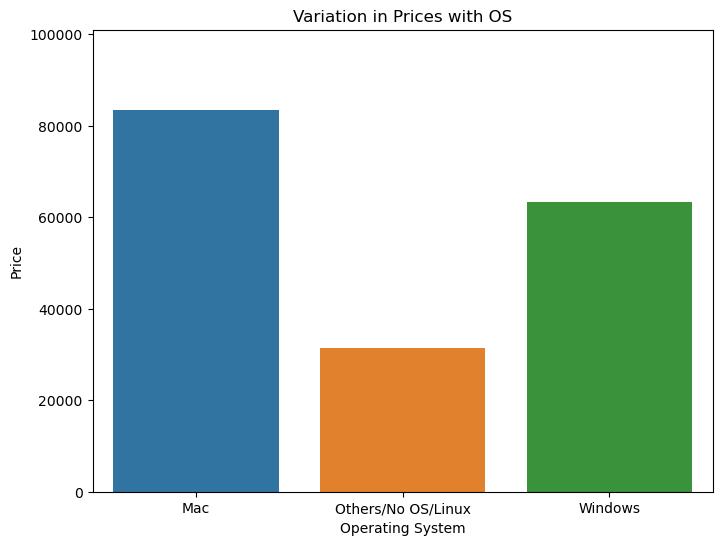

In [71]:
plt.figure(figsize = (8,6))
sns.barplot(data = data, x = 'Operating System', y = 'Price', errwidth = 0)
plt.title("Variation in Prices with OS")
plt.xlabel('Operating System')
plt.ylabel('Price')
plt.show()

#### Correlation Heatmap to observe multicollinearity

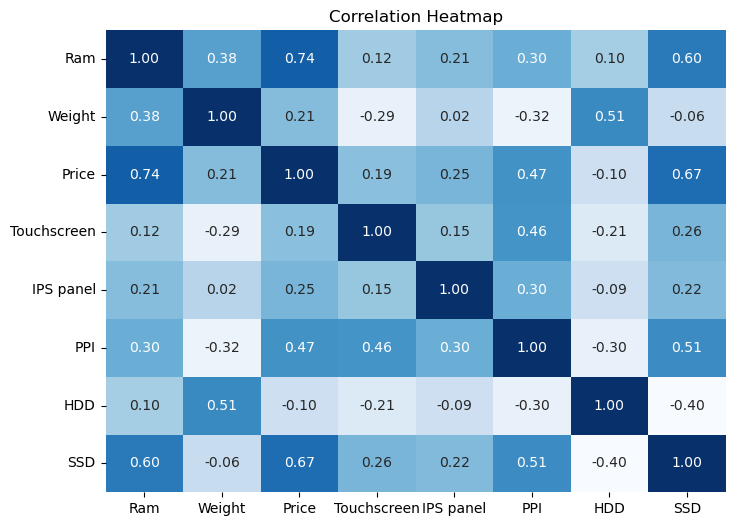

In [72]:
plt.figure(figsize = (8,6))
sns.heatmap(data = data.corr(), annot = True, fmt = ".2f", cbar = False, cmap = 'Blues')
plt.title("Correlation Heatmap")
plt.show()

#### Feature Engineering on target column ('Price')

In [73]:
data['Price'].skew()

1.5208655681688517

### Modelling

In [74]:
X = data.drop(columns = ['Price'])

In [75]:
y = np.log(data['Price'])

#### Train-test splitting

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1234)

In [78]:
X_train.shape

(1042, 12)

In [79]:
X_test.shape

(261, 12)

In [80]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS panel,PPI,CPU Brand,HDD,SSD,GPU Brand,Operating System
95,Acer,2 in 1 Convertible,8,1.50,1,1,165.632118,Intel Core i5,0,256,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
226,Dell,Notebook,16,2.30,1,0,141.211998,Intel Core i7,1000,0,AMD,Windows
1221,MSI,Gaming,8,2.20,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
112,Lenovo,2 in 1 Convertible,8,1.37,1,1,165.632118,Intel Core i5,0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
664,MSI,Gaming,8,2.70,0,0,127.335675,Intel Core i7,1000,128,Nvidia,Windows
1228,Lenovo,Gaming,16,2.60,1,1,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1077,MSI,Gaming,16,3.78,0,0,127.335675,Intel Core i7,1000,256,Nvidia,Windows
723,Dell,Gaming,32,4.36,0,0,254.671349,Intel Core i7,1000,1000,Nvidia,Windows


#### One-Hot Encoding for handling Categorical Columns

In [81]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [82]:
X_train.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Touchscreen', 'IPS panel',
       'PPI', 'CPU Brand', 'HDD', 'SSD', 'GPU Brand', 'Operating System'],
      dtype='object')

In [83]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [84]:
from sklearn.metrics import r2_score, mean_squared_error

### Model 1: Linear Regression

In [85]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print ("R2_score: ", r2_score(y_test, y_pred))
print ("MSE: ", mean_squared_error (y_test, y_pred))
print ("RMSE: ", np.sqrt(mean_squared_error (y_test, y_pred)))

R2_score:  0.8501230837149616
MSE:  0.0656020076085855
RMSE:  0.25612888866464384


### Model 2: Ridge Regression

In [86]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = Ridge()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print ("R2_score: ", r2_score(y_test, y_pred))
print ("MSE: ", mean_squared_error (y_test, y_pred))
print ("RMSE: ", np.sqrt(mean_squared_error (y_test, y_pred)))

R2_score:  0.8483698115776134
MSE:  0.0663694251332128
RMSE:  0.25762264095613335


### Model 3: Lasso Regression

In [87]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = Lasso(alpha = 0.001)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print ("R2_score: ", r2_score(y_test, y_pred))
print ("MSE: ", mean_squared_error (y_test, y_pred))
print ("RMSE: ", np.sqrt(mean_squared_error (y_test, y_pred)))

R2_score:  0.83985317388408
MSE:  0.07009720753372725
RMSE:  0.26475877234518075


### Model 4: KNN Regressor

In [88]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors = 3)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print ("R2_score: ", r2_score(y_test, y_pred))
print ("MSE: ", mean_squared_error (y_test, y_pred))
print ("RMSE: ", np.sqrt(mean_squared_error (y_test, y_pred)))

R2_score:  0.8202398968924719
MSE:  0.0786820542087533
RMSE:  0.2805032160399472


### Model 5: Decision Tree Regressor

In [89]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=10)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print ("R2_score: ", r2_score(y_test, y_pred))
print ("MSE: ", mean_squared_error (y_test, y_pred))
print ("RMSE: ", np.sqrt(mean_squared_error (y_test, y_pred)))

R2_score:  0.8457106673554973
MSE:  0.06753334819632029
RMSE:  0.2598717918442098


### Model 6: Random Forest

In [96]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100, random_state = 3, min_samples_split=4, max_samples = 0.5, max_features=0.75, max_depth=15)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print ("R2_score: ", r2_score(y_test, y_pred))
print ("MSE: ", mean_squared_error (y_test, y_pred))
print ("RMSE: ", np.sqrt(mean_squared_error (y_test, y_pred)))

R2_score:  0.8845596916057042
MSE:  0.05052890183046847
RMSE:  0.22478634707310066


### Model 7: Support Vector Regressor

In [91]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = SVR(kernel='rbf', C = 10000, epsilon=0.1)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print ("R2_score: ", r2_score(y_test, y_pred))
print ("MSE: ", mean_squared_error (y_test, y_pred))
print ("RMSE: ", np.sqrt(mean_squared_error (y_test, y_pred)))

R2_score:  0.819255251420021
MSE:  0.07911303932224895
RMSE:  0.2812704024995324


### Model 8: Extra Tree Regressor

In [92]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100, random_state = 3, min_samples_split=4, max_features=0.75, max_depth=15)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print ("R2_score: ", r2_score(y_test, y_pred))
print ("MSE: ", mean_squared_error (y_test, y_pred))
print ("RMSE: ", np.sqrt(mean_squared_error (y_test, y_pred)))

R2_score:  0.8764185158306462
MSE:  0.05409234234136387
RMSE:  0.23257760498673097


## Exporting the Best-Fitted Model

In [93]:
import pickle

In [97]:
pickle.dump(data, open('data.pkl', 'wb'))

In [98]:
pickle.dump(pipe, open('pipe.pkl', 'wb'))